# Trabalho No. 2

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

```{admonition} Questões

Capítulo III. Modelos ARIMA

Seção III.10: 10, 18, 20, 31, 32, 35, 36

```

In [140]:
import warnings
warnings.filterwarnings('ignore')

## Exercício 10

Seja $X_t$ um processo que represente a série de mortalidade cardiovascular **cmort** discutida no Exemplo II.2.

(a) Ajuste um modelo **AR(2)** à $X_t$ usando regressão linear como no Exemplo III.18.

(b) Assumindo que o modelo ajustado em (a) seja o modelo verdadeiro, encontre as previsões ao longo de um horizonte de quatro semanas, $X^n_{n+m}$ para $m=1,2,3,4$ e os intervalos de previsão de 95% correspondentes.


In [141]:
import pandas as pd


cmort = pd.read_csv('./dados/cmort.csv', parse_dates=True, index_col='index')
cmort.index = pd.DatetimeIndex(cmort.index).to_period('W')

In [142]:
from statsmodels.tsa.ar_model import AutoReg, AutoRegResults

ajuste_ar: AutoRegResults = AutoReg(cmort, lags=2, old_names=True).fit()

ajuste_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  cmort   No. Observations:                  508
Model:                     AutoReg(2)   Log Likelihood               -1597.312
Method:               Conditional MLE   S.D. of innovations              5.685
Date:                Fri, 09 Dec 2022   AIC                           3202.624
Time:                        16:01:12   BIC                           3219.530
Sample:                    01-18-1970   HQIC                          3209.254
                         - 10-07-1979                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.4506      2.394      4.784      0.000       6.759      16.142
cmort.L1       0.4286      0.040     10.770      0.000       0.351       0.507
cmort.L2       0.4418      0.040     11.111      0.000       0.364       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0957           +0.0000j            1.0957            0.0000
AR.2           -2.0658           +0.0000j            2.0658            0.5000
-----------------------------------------------------------------------------
"""

In [143]:
ultima_semana = len(cmort)
previsao_ar = ajuste_ar.get_prediction(start=ultima_semana, end=ultima_semana + 4).summary_frame()

previsao_ar

,mean,mean_se,mean_ci_lower,mean_ci_upper
1979-09-24/1979-09-30,87.599864,5.684848,76.457767,98.741961
1979-10-01/1979-10-07,86.763490,6.184973,74.641165,98.885814
1979-10-08/1979-10-14,87.337139,7.134227,73.354310,101.319967
1979-10-15/1979-10-21,87.213500,7.593357,72.330793,102.096206
1979-10-22/1979-10-28,87.413940,8.054210,71.627979,103.199901


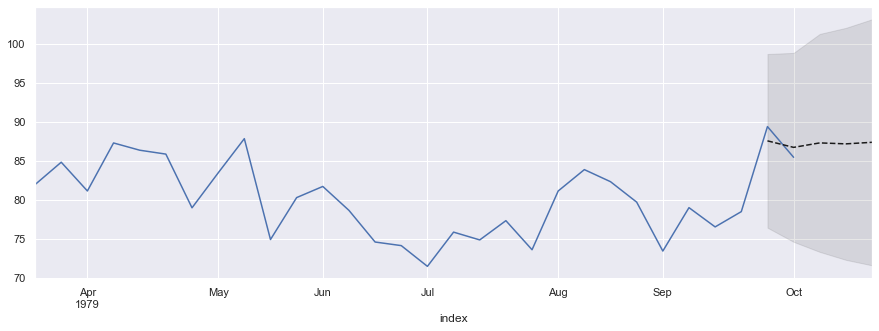

In [156]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))

cmort['cmort'].tail(30).plot(ax=ax);
previsao_ar['mean'].plot(ax=ax, style='k--');

ax.fill_between(previsao_ar.index, previsao_ar.mean_ci_lower, previsao_ar.mean_ci_upper, color='k', alpha=0.1);


## Exercício 18

Ajustar um modelo **AR(2)** para a série de mortalidade cardiovascular cmort discutida no Exemplo II.2. usando regressão linear e usando Yule-Walker.

(a) Compare as estimativas dos parâmetros obtidos pelos dois métodos.

(b) Compare os erros padrão estimados das estimativas dos coeficientes obtidos por regressão linear com suas aproximações assintóticas correspondentes, como dado no Teorema III.10.


In [145]:
from statsmodels.regression.linear_model import yule_walker

ajuste_yule_walker = yule_walker(cmort, order=2)

ajuste_yule_walker

(array([0.43147813, 0.44187887]), 5.68375799874225)

## Exercício 20

Repita o seguinte exercício numérico três vezes. Gere $n=500$ observações do modelo ARMA dado por $X_t=0.9X_{t−1} + W_t − 0.9W_{t−1}$, com $W_t \sim N(0,1)$ independentes. Plote os dados simulados, calcule o ACF e o PACF amostrais dos dados simulados e ajuste um modelo **ARMA(1,1)** aos dados. O que aconteceu e como você explica os resultados?

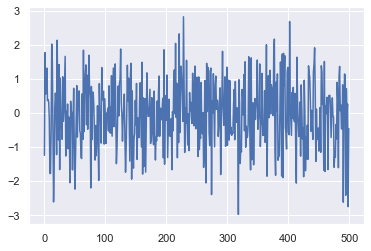

In [146]:
from statsmodels.tsa.api import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")

arparams = np.array([0.9])
maparams = np.array([-0.9])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

ex20_dados = arma_generate_sample(ar, ma, nsample=500)

sns.lineplot(data=ex20_dados);

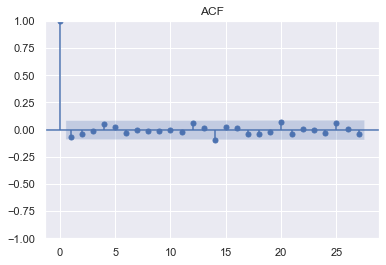

In [147]:
import statsmodels.graphics.tsaplots as sm_tsa_plots

sm_tsa_plots.plot_acf(ex20_dados, title="ACF");

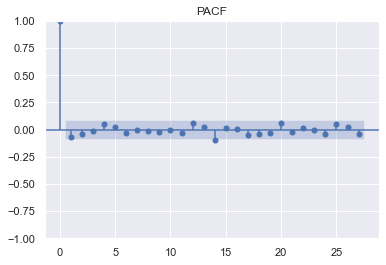

In [148]:
sm_tsa_plots.plot_pacf(ex20_dados, title="PACF");

In [149]:
ajuste = ARIMA(ex20_dados, order=(1, 0, 1)).fit()
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -707.828
Date:                Fri, 09 Dec 2022   AIC                           1423.657
Time:                        16:01:13   BIC                           1440.515
Sample:                             0   HQIC                          1430.272
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0484      0.040     -1.205      0.228      -0.127       0.030
ar.L1          0.2883      0.540      0.533      0.594      -0.771       1.348
ma.L1         -0.3621      0.529     -0.685      0.494      -1.399       0.674
sigma2         0.9934      0.068     14.612      0.000       0.860       1.127
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.94   Prob(JB):                         0.38
Heteroskedasticity (H):               1.11   Skew:                            -0.05
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como $X_t - 0.9 X_{t-1} = W_t - 0.9 W_{t-1}$, temos que $X_t = W_t$. O modelo encontra valores de $\phi_1 = - \theta_1$, porém com erro padrão muito alto, fazendo que não sejam estatísticamente significativos. Isso devido a relação entre os coeficientes que impossibilita o modelo de identificar o valor correto do parâmetro. Nota-se também nos gráficos do ACF e PACF que o lag=1 não é significativo.

## Exercício 31

No Exemplo III.40, apresentamos os diagnósticos para o MA(2) ajustado à série de taxas de crescimento do PIB. Usando esse exemplo como guia, conclua o diagnóstico para o ajuste do AR(1).

In [150]:
gnp = pd.read_csv('./dados/gnp.csv', parse_dates=True, index_col='index')
gnp.index = pd.DatetimeIndex(gnp.index)

ex31_ajuste: AutoRegResults = AutoReg(gnp, 1).fit()

ex31_ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                  223
Model:                     AutoReg(1)   Log Likelihood               -1132.936
Method:               Conditional MLE   S.D. of innovations             39.820
Date:                Fri, 09 Dec 2022   AIC                           2271.872
Time:                        16:01:13   BIC                           2282.080
Sample:                    04-01-1947   HQIC                          2275.994
                         - 07-01-2002                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8741      5.972      1.319      0.187      -3.830      19.579
value.L1       1.0062      0.001    857.334      0.000       1.004       1.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9939           +0.0000j            0.9939            0.0000
-----------------------------------------------------------------------------
"""

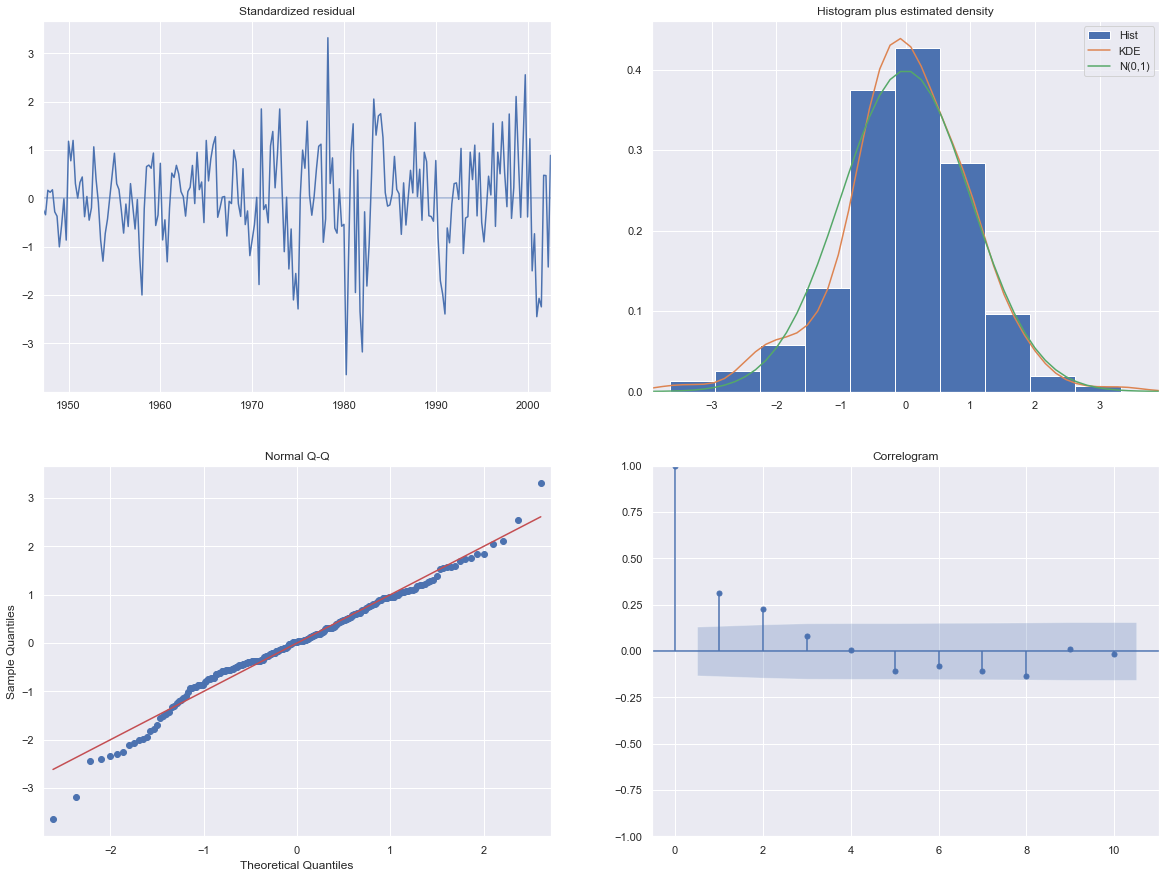

In [151]:
ex31_ajuste.plot_diagnostics(figsize=(20,15));

In [152]:
print(ex31_ajuste.diagnostic_summary())

       Test of No Serial Correlation       
       Lag  Ljung-Box LB P-value         DF
-------------------------------------------
         1     34.906      0.000          1
         2     34.919      0.000          2
         3     37.674      0.000          3
         4     39.233      0.000          4
         5     41.809      0.000          5
         6     46.204      0.000          6
         7     46.229      0.000          7
         8     46.292      0.000          8


             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
     16.561      0.000     -0.353      4.137


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      3.830      0.050          1
         2      5.675      0.059          2
         3      7.769      0.051          3
         4      9.113      0.058          4
         5      8.933   

Correlação e LB confirma que dados não são independentes

## Exercício 32

Os preços do petróleo bruto em dólares por barril são guardados em **oil**. Ajuste um modelo **ARIMA(p,d,q)** para a taxa de crescimento realizando todos os diagnósticos necessários. Comente.

In [153]:
oil = pd.read_csv('./dados/oil.csv', parse_dates=True, index_col='index')
oil.index = pd.DatetimeIndex(oil.index).to_period('W')

ex32_ajuste = ARIMA(oil, order=([1, 3, 5, 8],1,0)).fit()

ex32_ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                         value   No. Observations:                  545
Model:             ARIMA([1, 3, 5, 8], 1, 0)   Log Likelihood               -1268.428
Date:                       Fri, 09 Dec 2022   AIC                           2546.855
Time:                               16:01:14   BIC                           2568.350
Sample:                           01-02-2000   HQIC                          2555.259
                                - 06-20-2010                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1644      0.025      6.449      0.000       0.114       0.214
ar.L3          0.0843      0.025      3.322      0.001       0.035       0.134
ar.L5          0.0475      0.035      1.340      0.180      -0.022       0.117
ar.L8          0.1761      0.029      5.992      0.000       0.118       0.234
sigma2         6.2018      0.229     27.113      0.000       5.753       6.650
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               981.42
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               7.34   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

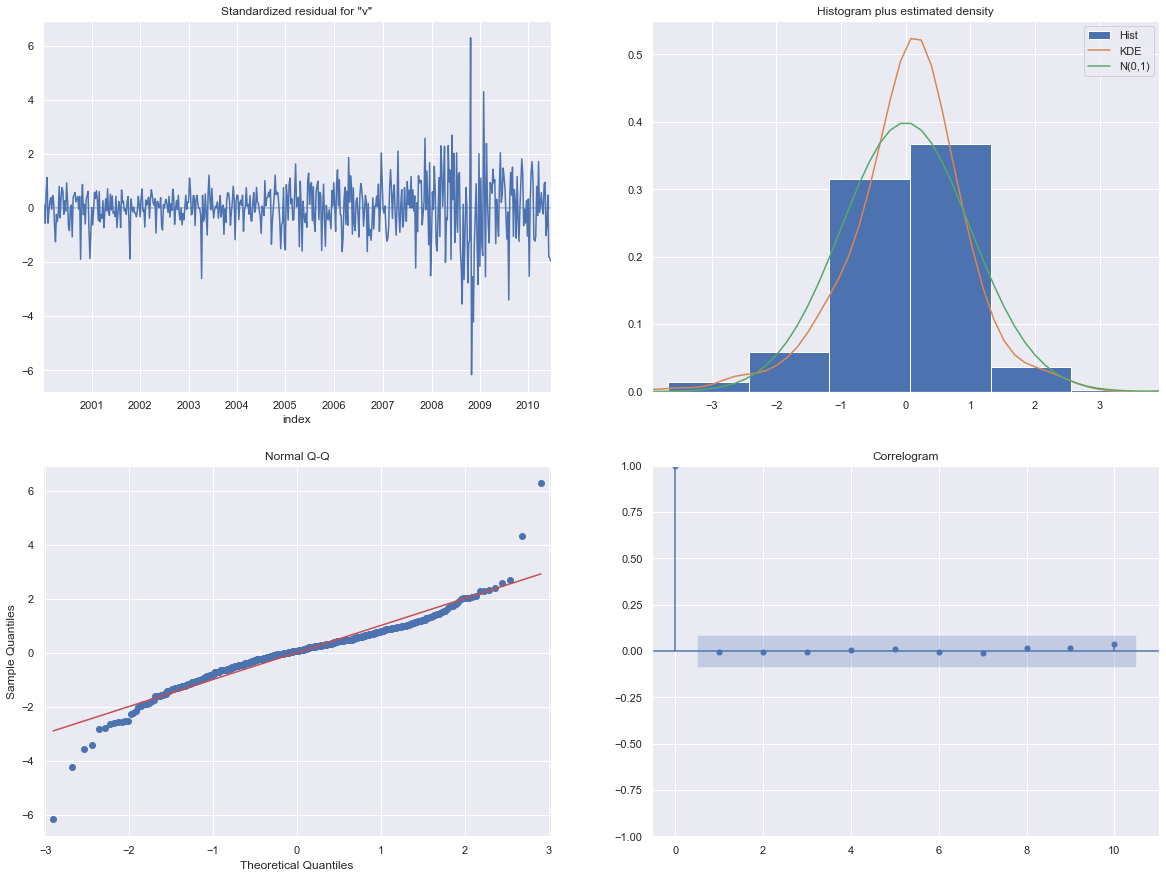

In [154]:
ex32_ajuste.plot_diagnostics(figsize=(20,15));

## Exercício 35

Consideremos que $S_t$ representa os dados de vendas mensais em **sales**, $n=150$ e seja $L_t$ o principal indicador em **lead**.

(a) Ajustar um modelo ARIMA para $S_t$, os dados de vendas mensais. Discuta seu modelo passo-a-passo, apresentando seu (A) exame inicial dos dados, (B) transformações, se necessário, (C) identificação inicial das ordens de dependência e grau de diferenciação, (D) estimativas dos parâmetros, (E) diagnósticos dos resíduos e escolha do modelo.

(b) Use os gráficos CCF e lag entre $∇S_t$ e $∇L_t$ para argumentar que uma regressão de $∇S_t$ em $∇L_t$ é razoável. Observe que, em lag2.plot(), a primeira série nomeada é aquela que fica defasada.

(c) Ajuste o modelo de regressão $∇S_t=β_0+β_1∇L_{t−3}+X_t$, onde $X_t$ é um processo ARMA. Explique como você decidiu o seu modelo para $X_t$. Discuta seus resultados. Veja o Exemplo III.45 para ajudar na codificação deste problema.

In [155]:
sales = pd.read_csv('./dados/sales.csv', index_col='index')
lead = pd.read_csv('./dados/lead.csv', index_col='index')

ex35_dados = sales.merge(lead, on='index', suffixes=('_sales', '_lead'))

ex35_dados

,value_sales,value_lead
index,,
1,200.1,10.01
2,199.5,10.07
3,199.4,10.32
4,198.9,9.75
5,199.0,10.33
...,...,...
146,263.3,13.50
147,262.8,13.58
148,261.8,13.51


## Exercício 36

Um dos notáveis desenvolvimentos tecnológicos na indústria de computadores tem sido a capacidade de armazenar informações densamente em um disco rígido. Além disso, o custo de armazenamento diminuiu constantemente, causando problemas de excesso de dados, em vez de big datas. O conjunto de dados para esta tarefa é o **cpg**, que consiste no preço mediano anual de varejo por GB de discos rígidos, digamos $C_t$, de uma amostra de fabricantes de 1980 a 2008.

(a) Mostre gráficamente $C_t$ e descreva o que você vê.

(b) Argumente que a curva $C_t$ versus $t$ se comporta como $C_t ≈ αe^{βt}$ ajustando uma regressão linear de $log(C_t)$ em t e então plotando a linha ajustada para compará-la aos dados registrados. Comente.

(c) Inspecione os resíduos do ajuste de regressão linear e comente.

(d) Ajuste a regressão novamente, mas agora usando o fato de que os erros são autocorrelacionados. Comente.